In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
folders = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'moon_jellyfish']
jelly_num = 0

folder = folders[jelly_num]

dataset_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/{folder}"

In [3]:
img_height, img_width = (224, 224)
batch_size = 32

train_data_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/Train_Test_Valid/train"
test_data_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/Train_Test_Valid/test"
valid_data_dir = f"C:/Users/user/SKT_Fly_AI/toy_project/jellyfish/Train_Test_Valid/valid"

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.4)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')

valid_generator = train_datagen.flow_from_directory(valid_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')
test_generator = train_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

Found 540 images belonging to 6 classes.
Found 12 images belonging to 6 classes.
Found 13 images belonging to 6 classes.


In [5]:
X, y = next(test_generator)
X.shape

(13, 224, 224, 3)

In [6]:
train_generator.num_classes

6

In [7]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=valid_generator, epochs=10, verbose=1)

c:\Users\user\anaconda3\envs\py\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4945 - loss: 2.1349 - val_accuracy: 0.7500 - val_loss: 0.7514
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8958 - loss: 0.2709 - val_accuracy: 0.7500 - val_loss: 0.7427
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9523 - loss: 0.1173 - val_accuracy: 0.8333 - val_loss: 0.6229
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9557 - loss: 0.1452 - val_accuracy: 0.9167 - val_loss: 0.5112
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9827 - loss: 0.0549 - val_accuracy: 0.8333 - val_loss: 0.7061
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9891 - loss: 0.0359 - val_accuracy: 0.7500 - val_loss: 1.2131
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9878 - loss: 0.0361 - val_accuracy: 0.7500 - val_loss: 0.9590
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9899 - loss: 0.0378 - val_accuracy: 0.8333 - val_loss:

In [8]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
test_acc

c:\Users\user\anaconda3\envs\py\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 - 1s - 892ms/step - accuracy: 0.7692 - loss: 0.7328


0.7692307829856873

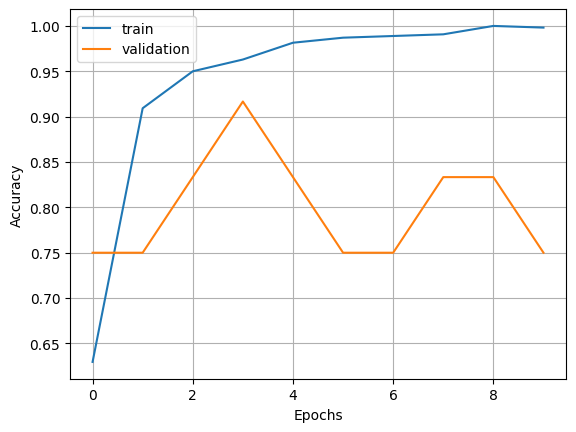

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()